## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

## Camera Calibration

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import glob
%matplotlib inline

In [2]:
#prepare object points
nx = 9
ny = 6

objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2) #x and y coordinates

objpoints = []
imgpoints = []

def img_undistort(img, mtx, dist):
    # Undistort image
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

In [3]:
images = glob.glob('camera_cal/calibration*.jpg')
for frame in images:
    img = cv2.imread(frame)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # find chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
dist_pickle = {}
dist_pickle['mtx'] = mtx
dist_pickle['dist'] = dist
pickle.dump(dist_pickle, open('camera_calibration.p','wb'))


Text(0.5, 1.0, 'Undistorted Image')

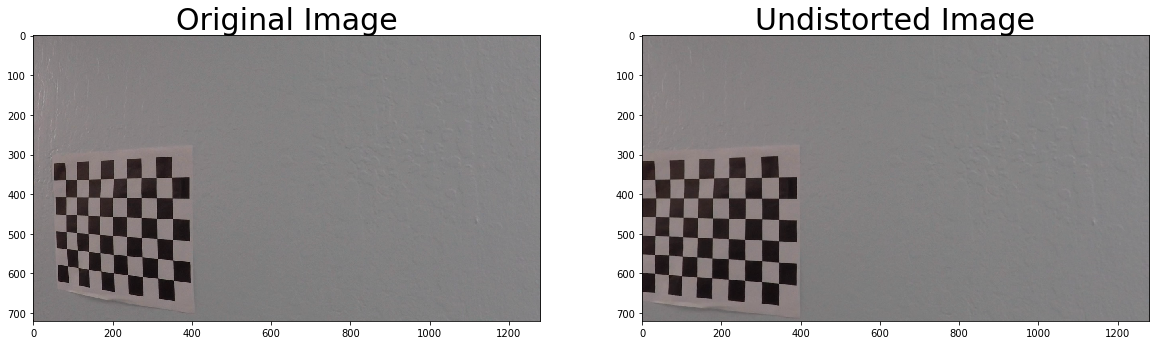

In [4]:
#Exmaple of the results
# We will take one chessboard image and one real world image and display it
chessboard_img = cv2.imread('camera_cal/calibration20.jpg')
chessboard_img_undistorted = img_undistort(chessboard_img,mtx,dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(chessboard_img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(chessboard_img_undistorted)
ax2.set_title('Undistorted Image', fontsize=30)

Text(0.5, 1.0, 'Undistorted Image')

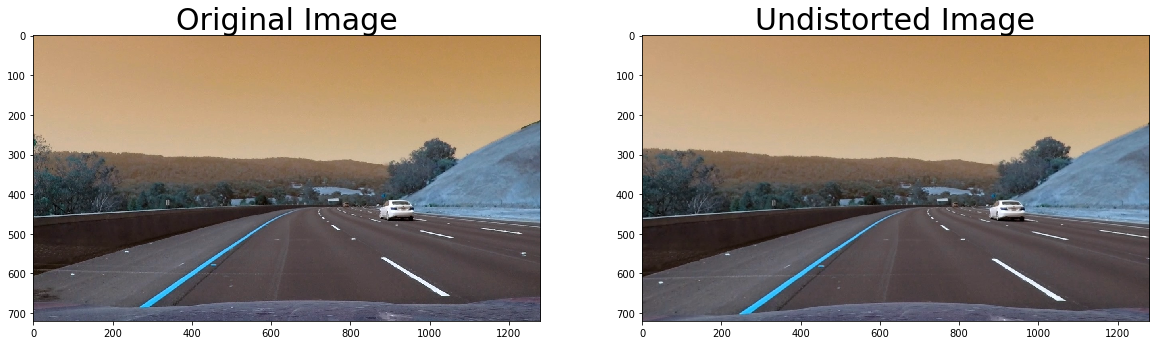

In [5]:
real_image = cv2.imread('test_images/test3.jpg')
real_image_undistiored = img_undistort(real_image,mtx,dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(real_image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(real_image_undistiored)
ax2.set_title('Undistorted Image', fontsize=30)

In [6]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    if orient == 'x':
        grad = np.absolute(cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = sobel_kernel))
        scaled_grad = np.uint8(255*grad/np.max(grad))
    if orient == 'y':
        grad = np.absolute(cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = sobel_kernel))
        scaled_grad = np.uint8(255*grad/np.max(grad))
    # Apply threshold
    grad_binary = np.zeros_like(img)
    grad_binary[(scaled_grad >= thresh[0]) & (scaled_grad <= thresh[1])] = 1
    return grad_binary

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    gradx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    grady = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    magnitude = np.sqrt(gradx**2 + grady**2)
    # Apply threshold
    mag_binary = np.zeros_like(img)
    mag_binary[(magnitude >= mag_thresh[0]) & (magnitude <= mag_thresh[1])] = 1
    return mag_binary

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    gradx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    grady = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    direction = np.arctan2(grady, gradx)
    # Apply threshold
    dir_binary = np.zeros_like(img)
    dir_binary[(direction >= thresh[0]) & (direction <= thresh[1])] = 1
    return dir_binary

def color_select_S(img,thresh = (170,255)):
    select = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)[:,:,2]
    binary_output = np.zeros_like(select)
    binary_output[(select >= thresh[0]) & (select <= thresh[1])] = 1
    return binary_output

def grayscale(img):
        return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        

## Undistort and perspective transform

In [11]:
img_size = [img.shape[1],img.shape[0]]
dist_pickle = pickle.load(open('camera_calibration.p','rb'))
mtx = dist_pickle['mtx']
dist = dist_pickle['dist']

src = np.float32([
     [(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
     [((img_size[0] / 6) - 10), img_size[1]],
     [(img_size[0] * 5 / 6) + 60, img_size[1]],
     [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])

dst = np.float32([
    [(img_size[0] / 4),0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])


M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)

In [13]:
warped = cv2.warpPerspective(combined_binary, M, (imshape[1], imshape[0]), flags=cv2.INTER_LINEAR)
plt.imshow(warped, cmap="gray")

NameError: name 'combined_binary' is not defined